In [1]:
from Postprocess_functions import *

Welcome to JupyROOT 6.26/10


In [19]:
import matplotlib as mpl

def setup_pgf():
    pgf_with_latex = {
        "pgf.texsystem": "pdflatex",
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": [],
        "font.sans-serif": [],
        "font.monospace": [],
        "axes.labelsize": 10,
        "font.size": 10,
        "legend.fontsize": 4,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        "pgf.preamble": "\n".join([
            r"\usepackage[utf8]{inputenc}",
            r"\usepackage[T1]{fontenc}",
            r"\usepackage[detect-all]{siunitx}",
        ])
    }
    mpl.use("pgf")
    mpl.rcParams.update(pgf_with_latex)
 # Set the figure size

    # Set the figure size based on LaTeX geometry settings
    geometry_textwidth = 384  # pt
    pt_to_inch = 1.0 / 72.27  # Conversion factor from points to inches
    plot_width = geometry_textwidth * pt_to_inch *0.5
    
    mpl.rcParams['figure.figsize'] = (plot_width, plot_width*0.9)  # Adjust the height as needed (6 inches in this example)
def restore_defaults():
    mpl.rcParams.update(mpl.rcParamsDefault)
setup_pgf()

In [2]:
import gmsh
import sys
import os
from os.path import exists
import subprocess
import numpy as np
import time
import ROOT
from os import listdir
from os.path import isfile, join
import os.path
from os import path
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import argparse
from ROOT import TFile, TTree
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev,splprep
from scipy.interpolate import BSpline
import math
def Initialization_Mult(args):
    print('Initializations')
    gen=[]
    gen_file=[]
    NSGA_files=[]
    root_folder=[]
    pictures_folder=[]
    pictures_folder_pareto=[]
    pictures_folder_filter=[]
    pictures_folder_filter_shape=[]
    
    c=0
    for fol in args.folder:
        root_folder.append(fol)
        gen.append(args.generation[c])
        print(gen)
        folder_path='/home/greales/Desktop/NSGAIIData/'+root_folder[c] # add path to ROOT/
        rf=os.listdir(folder_path)		# get all files in the folder
        NSGA_filenames = find_strings_containing_substring(rf, 'NSGAII_') # Get all root files
        print(rf)
        NSGA_filenames=sort_strings_by_int(NSGA_filenames)
        prefix = folder_path+'/'
        NSGA_files.append([prefix+s for s in NSGA_filenames])
        print(str(gen[c]))
        gen_file.append(folder_path+'/'+find_strings_containing_substring(rf, str(gen[c]))[0]) # Get last generation file or given gen.
        print('pictures/ROOT/'+root_folder[c]+'/Shape/')
        pictures_folder.append('pictures/ROOT/'+root_folder[c]+'/Shape/')
        print(pictures_folder)
        pictures_folder_pareto.append('pictures/ROOT/'+root_folder[c]+'/Pareto/')
        pictures_folder_filter.append('pictures/ROOT/'+root_folder[c]+'/Filter/')
        pictures_folder_filter_shape.append('pictures/ROOT/'+root_folder[c]+'/Filter/Shape_gen'+str(gen[c])+'/')

        create_folder(pictures_folder[c])  # Create required folders to store pictures
        create_folder(pictures_folder_pareto[c])  # Create required folders to store pictures
        create_folder(pictures_folder_filter[c])  # Create required folders to store pictures
        create_folder(pictures_folder_filter_shape[c])  # Create required folders to store pictures
        c+=1
        print('### Initializations END')
    return gen, gen_file, NSGA_files, root_folder, pictures_folder, pictures_folder_pareto, pictures_folder_filter, pictures_folder_filter_shape


In [3]:
# Fill the class with the required inputs:

class ArgValues:
    def __init__(self):
        self.folder = ["2307/G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x3_68Evts_Spline_23-07-16",
                       "2307/G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x6_68Evts_Spline_23-07-17",
                       "2307/G11_objLCP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-19",
                      "2307/G11_objLOP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-24",
                      "2307/G11_objLStP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-27",
                      "2307/G11_objLStAvg_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-08-03",
                     "2307/G11_objLOAvg_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-08-06",
                      "2307/BC408_LSP_230914",
                      "2307/Zhe_BC408_NSGAII",
                      "2307/Zhe_LYSO_NSGAII",
                      "2310/Tile5x5",
                      "2310/Tile5x5_th5",
                      "2310/Tile7x7_th5",
                      "2310/Tile5x5_th6_min1_flat"]
        #self.folder = "G11_objLC_Acte_YSym_SiMPmatch6mm_68Evts_Spline_23-02-09"
        #self.folder ="G11_objLC_Acte_NoYSym_SiMPmatch3_6mm_68Evts_Spline_23-02-12"
        self.generation = [32,11,13,100,99,21,25,350,399,65,65,13,10,29]
        self.Ysym = [1,1,1,1,1,1,1,1,1,1,1,1,1,1]
        self.LYSOL = [1,1,1,1,1,1,1,1,1,1,1,1,1,1]
        self.save = 1
        self.Shape = 0
        self.ParetoFrontier = 0
        self.Filter = 1
        self.LaunchIndv = 0
args0=ArgValues()

In [4]:
gen, gen_file, NSGA_files, root_folder, pictures_folder, pictures_folder_pareto, pictures_folder_filter, pictures_folder_filter_shape= Initialization_Mult(args0)
gen_file


Initializations
[32]
['NSGAII_3.root', 'NSGAII_14.root', 'NSGAII_11.root', 'NSGAII_17.root', 'NSGAII_2.root', 'NSGAII_0.root', 'NSGAII_5.root', 'NSGAII_12.root', 'NSGAII_16.root', 'NSGAII_8.root', 'NSGAII_7.root', 'NSGAII_29.root', 'NSGAII_26.root', 'NSGAII_13.root', 'NSGAII_4.root', 'NSGAII_18.root', 'NSGAII_27.root', 'NSGAII_28.root', 'NSGAII_9.root', 'NSGAII_10.root', 'NSGAII_31.root', 'NSGAII_20.root', 'NSGAII_25.root', 'NSGAII_32.root', 'NSGAII_24.root', 'NSGAII_30.root', 'NSGAII_22.root', 'NSGAII_23.root', 'NSGAII_1.root', 'NSGAII_6.root', 'NSGAII_19.root', 'NSGAII_15.root', 'NSGAII_21.root']
32
pictures/ROOT/2307/G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x3_68Evts_Spline_23-07-16/Shape/
['pictures/ROOT/2307/G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x3_68Evts_Spline_23-07-16/Shape/']
pictures/ROOT/2307/G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x3_68Evts_Spline_23-07-16/Shape/ already exists.
pictures/ROOT/2307/G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x3_68Evts_Spline_23-07-16/Pareto/ already exists.
pictures/R

['/home/greales/Desktop/NSGAIIData/2307/G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x3_68Evts_Spline_23-07-16/NSGAII_32.root',
 '/home/greales/Desktop/NSGAIIData/2307/G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x6_68Evts_Spline_23-07-17/NSGAII_11.root',
 '/home/greales/Desktop/NSGAIIData/2307/G11_objLCP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-19/NSGAII_13.root',
 '/home/greales/Desktop/NSGAIIData/2307/G11_objLOP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-24/NSGAII_100.root',
 '/home/greales/Desktop/NSGAIIData/2307/G11_objLStP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-27/NSGAII_99.root',
 '/home/greales/Desktop/NSGAIIData/2307/G11_objLStAvg_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-08-03/NSGAII_21.root',
 '/home/greales/Desktop/NSGAIIData/2307/G11_objLOAvg_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-08-06/NSGAII_25.root',
 '/home/greales/Desktop/NSGAIIData/2307/BC408_LSP_230914/NSGAII_350.root',
 '/home/greales/Desktop/NSGAIIData/2307/Zhe_BC408_NSGAII/NSGAII_399.root',
 '/home/greal

In [5]:
print(files)

NameError: name 'files' is not defined

1036.26


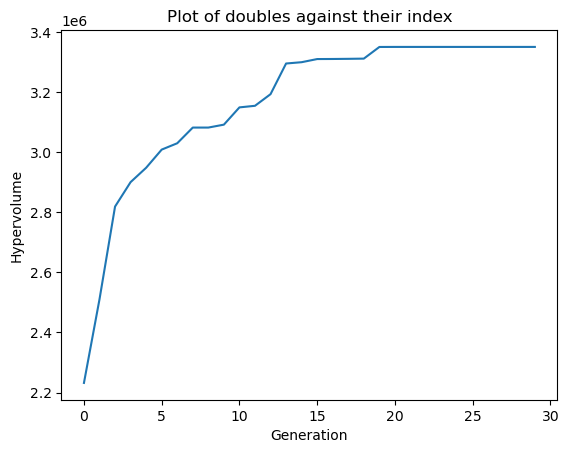

In [6]:
class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout
        
from pygmo import hypervolume

# Define the reference point
maxvol=3*6*28.5*2*1.01
print(maxvol)
reference_point = [0, maxvol]  # This should be slightly greater than the maximum objective values
hvv=[]
files= NSGA_files[13][:]
for name in files:
    with HiddenPrints():
        num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(name)
    #obj1f,obj2f,idxf=filter_values(obj1,obj2,20)
    popul = [[i,j] for i,j in zip(obj1,obj2) if i< 0 and j<1000]
    # Create a hypervolume object
    hv = hypervolume(popul)
    # Calculate hypervolume
    volume = hv.compute(reference_point)
    hvv.append(volume)

import matplotlib.pyplot as plt

plt.plot(hvv)
plt.xlabel('Generation')
plt.ylabel('Hypervolume')
plt.title('Plot of doubles against their index')
plt.show()

1036.26


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


43
75


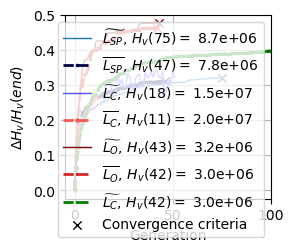

In [7]:
import matplotlib.pyplot as plt

# Define the reference point
maxvol=3*6*28.5*2*1.01
print(maxvol)
reference_point = [0, maxvol]  # This should be slightly greater than the maximum objective values


files= NSGA_files[3][:]
def getHypervolume(files):
    hvv=[]
    for name in files:
        with HiddenPrints():
            num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(name)
        #obj1f,obj2f,idxf=filter_values(obj1,obj2,20)
        popul = [[i,j] for i,j in zip(obj1,obj2) if i< 0 and j<1000]
        # Create a hypervolume object
        hv = hypervolume(popul)
        # Calculate hypervolume
        volume = hv.compute(reference_point)
        hvv.append(volume)
    return hvv
def find_converged_generation(hvv):
    num_generations = len(hvv)
    consecutive_increases = 0
    num=10
    for i in range(num+1, num_generations):
        relative_change = (hvv[i] - hvv[i - num]) / (hvv[i]-hvv[0])
        if relative_change <= 0.01:  # 1% change or less
            return i  # Return the index where the 10 consecutive increases started

    return [None,relative_change]  # If no convergence is found
geometry_textwidth = 384  # pt
pt_to_inch = 1.0 / 72.27  # Conversion factor from points to inches
plot_width = geometry_textwidth * pt_to_inch *0.5
fig, ax = plt.subplots(figsize=(plot_width, plot_width*0.9))

files= NSGA_files[2][:]
hvv2=getHypervolume(files)
hvv20 = [(hvv2i - hvv2[0])/hvv2[-1] for hvv2i in hvv2]

files= NSGA_files[3][:]
hvv3=getHypervolume(files)
hvv30 = [(hvv3i- hvv3[0])/hvv3[100] for hvv3i in hvv3]

files= NSGA_files[4][:]
hvv4=getHypervolume(files)
hvv40 = [(hvv4i- hvv4[0])/hvv4[-1] for hvv4i in hvv4]

files= NSGA_files[1][:]
hvv0=getHypervolume(files)
hvv00 = [(hvv0i- hvv0[0])/hvv0[-1] for hvv0i in hvv0]

files= NSGA_files[5][:]
hvv5=getHypervolume(files)
hvv05 = [(hvv5i- hvv5[0])/hvv5[-1] for hvv5i in hvv5]

files= NSGA_files[6][:]
hvv6=getHypervolume(files)
hvv06 = [(hvv6i- hvv6[0])/hvv6[-1] for hvv6i in hvv6]

files= NSGA_files[7][:]
hvv7=getHypervolume(files)
hvv07 = [(hvv7i- hvv7[0])/hvv7[-1] for hvv7i in hvv7]

chvv3=find_converged_generation(hvv3)
print(chvv3)
chvv4=find_converged_generation(hvv4)
print(chvv4)

import matplotlib.cm as cm

# Define the extreme colors
blue = '#1f77b4'
red = '#d62728'
n_points = 4  # Number of intermediate colors

# Generate intermediate colors
intermediate_colors = [cm.seismic(i/(n_points-1)) for i in range(n_points)]

# Plot using the colors
plt.plot(hvv40[0:chvv4], c=blue, label=r'$\widetilde{L_{SP}}$, $H_v(75)=$' + ' ' + "%.1e" % hvv4[-1], linewidth=1)
plt.plot(hvv05, c=intermediate_colors[0], marker='s', ms=2, label=r'$\overline{L_{SP}}$, $H_v(47)=$' + ' ' + "%.1e" % hvv5[-1], linewidth=2,
         linestyle='dashed')

plt.plot(hvv20, c=intermediate_colors[1], label=r'$\widetilde{L_C}$, $H_v(18)=$' + ' ' + "%.1e" % hvv2[-1], linewidth=1)
plt.plot(hvv00, c=intermediate_colors[2], marker='D', ms=2, label=r'$\overline{L_C}$, $H_v(11)=$' + ' ' + "%.1e" % hvv0[-1], linewidth=2,
         linestyle='dashed')

plt.plot(hvv30[0:chvv3], c=intermediate_colors[3], label=r'$\widetilde{L_O}$, $H_v(43)=$' + ' ' + "%.1e" % hvv3[-1], linewidth=1)
plt.plot(hvv06, c=red, marker='*', ms=2, label=r'$\overline{L_O}$, $H_v(42)=$' + ' ' + "%.1e" % hvv6[-1], linewidth=2, linestyle='dashed')

plt.plot(hvv07, c='green', marker='*', ms=2, label=r'$\widetilde{L_C}$, $H_v(42)=$' + ' ' + "%.1e" % hvv6[-1], linewidth=2, linestyle='dashed')


#    ax1.scatter(obj1fy,obj2fy, s=ms, c=colorf, edgecolor=colore, marker=mk,linewidths=0.5)

plt.scatter(chvv3,hvv30[chvv3],c=intermediate_colors[3], marker='x',linewidths=1)
plt.scatter(chvv4,hvv40[chvv4],c='black', marker='x',linewidths=1,label='Convergence criteria')
plt.scatter(chvv4,hvv40[chvv4],c=blue, marker='x',linewidths=1)
plt.scatter(46,hvv05[-1],c=intermediate_colors[0], marker='x',linewidths=1)
plt.scatter(42,hvv06[-1],c=red, marker='x',linewidths=1)


plt.grid()

ax.legend()
ax.set_xlim(left=-5,right=100)
plt.xlabel('Generation')
plt.ylabel('$\Delta H_v/H_v(end)$')

plt.savefig("Figures/2307/NSGAII/Hypervolume1.pdf", bbox_inches='tight')


1036.26
43
75


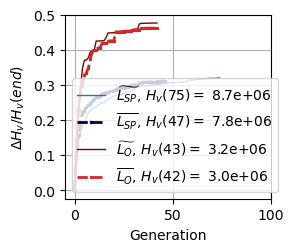

In [8]:
import matplotlib.pyplot as plt

# Define the reference point
maxvol=3*6*28.5*2*1.01
print(maxvol)
reference_point = [0, maxvol]  # This should be slightly greater than the maximum objective values


files= NSGA_files[3][:]
def getHypervolume(files):
    hvv=[]
    for name in files:
        with HiddenPrints():
            num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(name)
        #obj1f,obj2f,idxf=filter_values(obj1,obj2,20)
        popul = [[i,j] for i,j in zip(obj1,obj2) if i< 0 and j<1000]
        # Create a hypervolume object
        hv = hypervolume(popul)
        # Calculate hypervolume
        volume = hv.compute(reference_point)
        hvv.append(volume)
    return hvv
def find_converged_generation(hvv):
    num_generations = len(hvv)
    consecutive_increases = 0
    num=10
    for i in range(num+1, num_generations):
        relative_change = (hvv[i] - hvv[i - num]) / (hvv[i]-hvv[0])
        if relative_change <= 0.01:  # 1% change or less
            return i  # Return the index where the 10 consecutive increases started

    return [None,relative_change]  # If no convergence is found
geometry_textwidth = 384  # pt
pt_to_inch = 1.0 / 72.27  # Conversion factor from points to inches
plot_width = geometry_textwidth * pt_to_inch *0.5
fig, ax = plt.subplots(figsize=(plot_width, plot_width*0.9))

files= NSGA_files[2][:]
hvv2=getHypervolume(files)
hvv20 = [(hvv2i - hvv2[0])/hvv2[-1] for hvv2i in hvv2]

files= NSGA_files[3][:]
hvv3=getHypervolume(files)
hvv30 = [(hvv3i- hvv3[0])/hvv3[100] for hvv3i in hvv3]

files= NSGA_files[4][:]
hvv4=getHypervolume(files)
hvv40 = [(hvv4i- hvv4[0])/hvv4[-1] for hvv4i in hvv4]

files= NSGA_files[1][:]
hvv0=getHypervolume(files)
hvv00 = [(hvv0i- hvv0[0])/hvv0[-1] for hvv0i in hvv0]

files= NSGA_files[5][:]
hvv5=getHypervolume(files)
hvv05 = [(hvv5i- hvv5[0])/hvv5[-1] for hvv5i in hvv5]

files= NSGA_files[6][:]
hvv6=getHypervolume(files)
hvv06 = [(hvv6i- hvv6[0])/hvv6[-1] for hvv6i in hvv6]

files= NSGA_files[7][:]
hvv7=getHypervolume(files)
hvv07 = [(hvv7i- hvv7[0])/hvv7[-1] for hvv7i in hvv7]

chvv3=find_converged_generation(hvv3)
print(chvv3)
chvv4=find_converged_generation(hvv4)
print(chvv4)

import matplotlib.cm as cm

# Define the extreme colors
blue = '#1f77b4'
red = '#d62728'
n_points = 4  # Number of intermediate colors

# Generate intermediate colors
intermediate_colors = [cm.seismic(i/(n_points-1)) for i in range(n_points)]

# Plot using the colors
plt.plot(hvv40[0:chvv4], c=blue, label=r'$\widetilde{L_{SP}}$, $H_v(75)=$' + ' ' + "%.1e" % hvv4[-1], linewidth=1)
plt.plot(hvv05, c=intermediate_colors[0], marker='s', ms=2, label=r'$\overline{L_{SP}}$, $H_v(47)=$' + ' ' + "%.1e" % hvv5[-1], linewidth=2,
         linestyle='dashed')

#plt.plot(hvv20, c=intermediate_colors[1], label=r'$\widetilde{L_C}$, $H_v(18)=$' + ' ' + "%.1e" % hvv2[-1], linewidth=1)
#plt.plot(hvv00, c=intermediate_colors[2], marker='D', ms=2, label=r'$\overline{L_C}$, $H_v(11)=$' + ' ' + "%.1e" % hvv0[-1], linewidth=2,
#         linestyle='dashed')

plt.plot(hvv30[0:chvv3], c=intermediate_colors[3], label=r'$\widetilde{L_O}$, $H_v(43)=$' + ' ' + "%.1e" % hvv3[-1], linewidth=1)
plt.plot(hvv06, c=red, marker='*', ms=2, label=r'$\overline{L_O}$, $H_v(42)=$' + ' ' + "%.1e" % hvv6[-1], linewidth=2, linestyle='dashed')

#plt.plot(hvv07, c='green', marker='*', ms=2, label=r'$\widetilde{L_C}$, $H_v(42)=$' + ' ' + "%.1e" % hvv6[-1], linewidth=2, linestyle='dashed')


#    ax1.scatter(obj1fy,obj2fy, s=ms, c=colorf, edgecolor=colore, marker=mk,linewidths=0.5)

#plt.scatter(chvv3,hvv30[chvv3],c=intermediate_colors[3], marker='x',linewidths=1)
#plt.scatter(chvv4,hvv40[chvv4],c='black', marker='x',linewidths=1,label='Convergence criteria')
#plt.scatter(chvv4,hvv40[chvv4],c=blue, marker='x',linewidths=1)
#plt.scatter(46,hvv05[-1],c=intermediate_colors[0], marker='x',linewidths=1)
#plt.scatter(42,hvv06[-1],c=red, marker='x',linewidths=1)


plt.grid()

ax.legend()
ax.set_xlim(left=-5,right=100)
plt.xlabel('Generation')
plt.ylabel('$\Delta H_v/H_v(end)$')

plt.savefig("Figures/2307/NSGAII/Hypervolume_LSP_LO.pdf", bbox_inches='tight')


1036.26
43
75


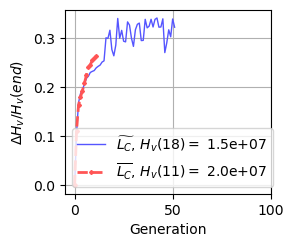

In [8]:
import matplotlib.pyplot as plt

# Define the reference point
maxvol=3*6*28.5*2*1.01
print(maxvol)
reference_point = [0, maxvol]  # This should be slightly greater than the maximum objective values


files= NSGA_files[3][:]
def getHypervolume(files):
    hvv=[]
    for name in files:
        with HiddenPrints():
            num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(name)
        #obj1f,obj2f,idxf=filter_values(obj1,obj2,20)
        popul = [[i,j] for i,j in zip(obj1,obj2) if i< 0 and j<1000]
        # Create a hypervolume object
        hv = hypervolume(popul)
        # Calculate hypervolume
        volume = hv.compute(reference_point)
        hvv.append(volume)
    return hvv
def find_converged_generation(hvv):
    num_generations = len(hvv)
    consecutive_increases = 0
    num=10
    for i in range(num+1, num_generations):
        relative_change = (hvv[i] - hvv[i - num]) / (hvv[i]-hvv[0])
        if relative_change <= 0.01:  # 1% change or less
            return i  # Return the index where the 10 consecutive increases started

    return [None,relative_change]  # If no convergence is found
geometry_textwidth = 384  # pt
pt_to_inch = 1.0 / 72.27  # Conversion factor from points to inches
plot_width = geometry_textwidth * pt_to_inch *0.5
fig, ax = plt.subplots(figsize=(plot_width, plot_width*0.9))

files= NSGA_files[2][:]
hvv2=getHypervolume(files)
hvv20 = [(hvv2i - hvv2[0])/hvv2[-1] for hvv2i in hvv2]

files= NSGA_files[3][:]
hvv3=getHypervolume(files)
hvv30 = [(hvv3i- hvv3[0])/hvv3[100] for hvv3i in hvv3]

files= NSGA_files[4][:]
hvv4=getHypervolume(files)
hvv40 = [(hvv4i- hvv4[0])/hvv4[-1] for hvv4i in hvv4]

files= NSGA_files[1][:]
hvv0=getHypervolume(files)
hvv00 = [(hvv0i- hvv0[0])/hvv0[-1] for hvv0i in hvv0]

files= NSGA_files[5][:]
hvv5=getHypervolume(files)
hvv05 = [(hvv5i- hvv5[0])/hvv5[-1] for hvv5i in hvv5]

files= NSGA_files[6][:]
hvv6=getHypervolume(files)
hvv06 = [(hvv6i- hvv6[0])/hvv6[-1] for hvv6i in hvv6]

files= NSGA_files[7][:]
hvv7=getHypervolume(files)
hvv07 = [(hvv7i- hvv7[0])/hvv7[-1] for hvv7i in hvv7]

chvv3=find_converged_generation(hvv3)
print(chvv3)
chvv4=find_converged_generation(hvv4)
print(chvv4)

import matplotlib.cm as cm

# Define the extreme colors
blue = '#1f77b4'
red = '#d62728'
n_points = 4  # Number of intermediate colors

# Generate intermediate colors
intermediate_colors = [cm.seismic(i/(n_points-1)) for i in range(n_points)]

# Plot using the colors
#plt.plot(hvv40[0:chvv4], c=blue, label=r'$\widetilde{L_{SP}}$, $H_v(75)=$' + ' ' + "%.1e" % hvv4[-1], linewidth=1)
#plt.plot(hvv05, c=intermediate_colors[0], marker='s', ms=2, label=r'$\overline{L_{SP}}$, $H_v(47)=$' + ' ' + "%.1e" % hvv5[-1], linewidth=2,
#         linestyle='dashed')

plt.plot(hvv20, c=intermediate_colors[1], label=r'$\widetilde{L_C}$, $H_v(18)=$' + ' ' + "%.1e" % hvv2[-1], linewidth=1)
plt.plot(hvv00, c=intermediate_colors[2], marker='D', ms=2, label=r'$\overline{L_C}$, $H_v(11)=$' + ' ' + "%.1e" % hvv0[-1], linewidth=2,
         linestyle='dashed')

#plt.plot(hvv30[0:chvv3], c=intermediate_colors[3], label=r'$\widetilde{L_O}$, $H_v(43)=$' + ' ' + "%.1e" % hvv3[-1], linewidth=1)
#plt.plot(hvv06, c=red, marker='*', ms=2, label=r'$\overline{L_O}$, $H_v(42)=$' + ' ' + "%.1e" % hvv6[-1], linewidth=2, linestyle='dashed')

#plt.plot(hvv07, c='green', marker='*', ms=2, label=r'$\widetilde{L_C}$, $H_v(42)=$' + ' ' + "%.1e" % hvv6[-1], linewidth=2, linestyle='dashed')


#    ax1.scatter(obj1fy,obj2fy, s=ms, c=colorf, edgecolor=colore, marker=mk,linewidths=0.5)

#plt.scatter(chvv3,hvv30[chvv3],c=intermediate_colors[3], marker='x',linewidths=1)
#plt.scatter(chvv4,hvv40[chvv4],c='black', marker='x',linewidths=1,label='Convergence criteria')
#plt.scatter(chvv4,hvv40[chvv4],c=blue, marker='x',linewidths=1)
#plt.scatter(46,hvv05[-1],c=intermediate_colors[0], marker='x',linewidths=1)
#plt.scatter(42,hvv06[-1],c=red, marker='x',linewidths=1)


plt.grid()

ax.legend()
ax.set_xlim(left=-5,right=100)
plt.xlabel('Generation')
plt.ylabel('$\Delta H_v/H_v(end)$')

plt.savefig("Figures/2307/NSGAII/Hypervolume_LC.pdf", bbox_inches='tight')


1036.26
43
75


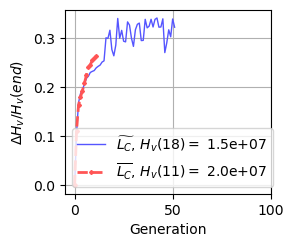

In [9]:
import matplotlib.pyplot as plt

# Define the reference point
maxvol=3*6*28.5*2*1.01
print(maxvol)
reference_point = [0, maxvol]  # This should be slightly greater than the maximum objective values


files= NSGA_files[3][:]
def getHypervolume(files):
    hvv=[]
    for name in files:
        with HiddenPrints():
            num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(name)
        #obj1f,obj2f,idxf=filter_values(obj1,obj2,20)
        popul = [[i,j] for i,j in zip(obj1,obj2) if i< 0 and j<1000]
        # Create a hypervolume object
        hv = hypervolume(popul)
        # Calculate hypervolume
        volume = hv.compute(reference_point)
        hvv.append(volume)
    return hvv
def find_converged_generation(hvv):
    num_generations = len(hvv)
    consecutive_increases = 0
    num=10
    for i in range(num+1, num_generations):
        relative_change = (hvv[i] - hvv[i - num]) / (hvv[i]-hvv[0])
        if relative_change <= 0.01:  # 1% change or less
            return i  # Return the index where the 10 consecutive increases started

    return [None,relative_change]  # If no convergence is found
geometry_textwidth = 384  # pt
pt_to_inch = 1.0 / 72.27  # Conversion factor from points to inches
plot_width = geometry_textwidth * pt_to_inch *0.5
fig, ax = plt.subplots(figsize=(plot_width, plot_width*0.9))

files= NSGA_files[2][:]
hvv2=getHypervolume(files)
hvv20 = [(hvv2i - hvv2[0])/hvv2[-1] for hvv2i in hvv2]

files= NSGA_files[3][:]
hvv3=getHypervolume(files)
hvv30 = [(hvv3i- hvv3[0])/hvv3[100] for hvv3i in hvv3]

files= NSGA_files[4][:]
hvv4=getHypervolume(files)
hvv40 = [(hvv4i- hvv4[0])/hvv4[-1] for hvv4i in hvv4]

files= NSGA_files[1][:]
hvv0=getHypervolume(files)
hvv00 = [(hvv0i- hvv0[0])/hvv0[-1] for hvv0i in hvv0]

files= NSGA_files[5][:]
hvv5=getHypervolume(files)
hvv05 = [(hvv5i- hvv5[0])/hvv5[-1] for hvv5i in hvv5]

files= NSGA_files[6][:]
hvv6=getHypervolume(files)
hvv06 = [(hvv6i- hvv6[0])/hvv6[-1] for hvv6i in hvv6]

files= NSGA_files[7][:]
hvv7=getHypervolume(files)
hvv07 = [(hvv7i- hvv7[0])/hvv7[-1] for hvv7i in hvv7]

chvv3=find_converged_generation(hvv3)
print(chvv3)
chvv4=find_converged_generation(hvv4)
print(chvv4)

import matplotlib.cm as cm

# Define the extreme colors
blue = '#1f77b4'
red = '#d62728'
n_points = 4  # Number of intermediate colors

# Generate intermediate colors
intermediate_colors = [cm.seismic(i/(n_points-1)) for i in range(n_points)]

# Plot using the colors
#plt.plot(hvv40[0:chvv4], c=blue, label=r'$\widetilde{L_{SP}}$, $H_v(75)=$' + ' ' + "%.1e" % hvv4[-1], linewidth=1)
#plt.plot(hvv05, c=intermediate_colors[0], marker='s', ms=2, label=r'$\overline{L_{SP}}$, $H_v(47)=$' + ' ' + "%.1e" % hvv5[-1], linewidth=2,
#         linestyle='dashed')

plt.plot(hvv20, c=intermediate_colors[1], label=r'$\widetilde{L_C}$, $H_v(18)=$' + ' ' + "%.1e" % hvv2[-1], linewidth=1)
plt.plot(hvv00, c=intermediate_colors[2], marker='D', ms=2, label=r'$\overline{L_C}$, $H_v(11)=$' + ' ' + "%.1e" % hvv0[-1], linewidth=2,
         linestyle='dashed')

#plt.plot(hvv30[0:chvv3], c=intermediate_colors[3], label=r'$\widetilde{L_O}$, $H_v(43)=$' + ' ' + "%.1e" % hvv3[-1], linewidth=1)
#plt.plot(hvv06, c=red, marker='*', ms=2, label=r'$\overline{L_O}$, $H_v(42)=$' + ' ' + "%.1e" % hvv6[-1], linewidth=2, linestyle='dashed')

#plt.plot(hvv07, c='green', marker='*', ms=2, label=r'$\widetilde{L_C}$, $H_v(42)=$' + ' ' + "%.1e" % hvv6[-1], linewidth=2, linestyle='dashed')


#    ax1.scatter(obj1fy,obj2fy, s=ms, c=colorf, edgecolor=colore, marker=mk,linewidths=0.5)

#plt.scatter(chvv3,hvv30[chvv3],c=intermediate_colors[3], marker='x',linewidths=1)
#plt.scatter(chvv4,hvv40[chvv4],c='black', marker='x',linewidths=1,label='Convergence criteria')
#plt.scatter(chvv4,hvv40[chvv4],c=blue, marker='x',linewidths=1)
#plt.scatter(46,hvv05[-1],c=intermediate_colors[0], marker='x',linewidths=1)
#plt.scatter(42,hvv06[-1],c=red, marker='x',linewidths=1)


plt.grid()

ax.legend()
ax.set_xlim(left=-5,right=100)
plt.xlabel('Generation')
plt.ylabel('$\Delta H_v/H_v(end)$')

plt.savefig("Figures/2307/NSGAII/Hypervolume_LO.pdf", bbox_inches='tight')


In [10]:
hvv=hvv6
num_generations = len(hvv)
consecutive_increases = 0
num=10
for i in range(num+1, num_generations):
        relative_change = (hvv[i] - hvv[i - num]) / (hvv[i]-hvv[0])
        print(relative_change)

0.7024813219009884
0.43877663968887665
0.2804818561017375
0.28886570340388285
0.21666893548734545
0.20268255872483829
0.18310748625617412
0.12241270595350538
0.07105114223511384
0.06411031567495316
0.11203308138108647
0.10088373018531156
0.10059806872953848
0.07434993310632348
0.07355053964665478
0.07162600226023548
0.06118396510130915
0.06075612245557601
0.06111673292144163
0.06868330686196844
0.013465030086417522
0.01366393400071681
0.01384852910048939
0.020541507481533574
0.02028679918820981
0.019289221026729052
0.019049852313131346
0.018988675150975725
0.018066041894791364
0.009685552211320328
0.009859759208106314
0.01050277186856148


### Filter - PF


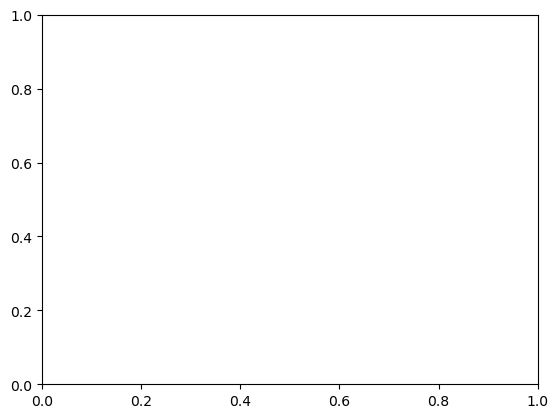

In [16]:
	##############
	### FILTER ###
	##############
print('### Filter - PF')
fig1, ax1 = plt.subplots()

def plt_filtered_PF(fig1,ax1,gen_file,colorf,colore,lab='',mk='o'):
    # Get required input for plotting the crystal shapes
    num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(gen_file)
    obj1f,obj2f,idxf=filter_values(obj1,obj2,20)
    print(idxf)
    #ax1.errorbar(obj1f,obj2f, fmt='o', capsize=3)
    ax1.scatter(obj1f,obj2f, s=19, c=colorf, edgecolor=colore, marker=mk,label=lab)
#    ax.errorbar(x, y, xerr=xerr, fmt='o', capsize=3)

In [17]:
plt_filtered_PF(fig1,ax1,gen_file[2],'gray','gray',lab='SiPM 3\\si{\milli\meter}x6\\si{\milli\meter}')


The number of vars per indv is :11
The number indv is :200
[2, 5, 7, 98, 11, 15, 129, 17, 177, 21, 103, 23, 25, 141, 28, 153, 31, 100, 35, 38, 39, 146, 140, 40, 175, 139, 41, 44, 45, 47, 49, 122, 51, 83, 52, 53, 132, 54, 108]


In [20]:
def filter_values(x, y, y_range, axis=0):
    filtered_x = []
    filtered_y = []
    filtered_indexes = []
    y0 = min(y)
    y1 = y0 + y_range
    ymax = max(y)
    while y0 < ymax:
        min_x = None
        min_x_index = None
        for i in range(len(x)):
            if y0 <= y[i] < y1:
                if min_x is None or x[i] < min_x:
                    min_x = x[i]
                    min_x_index = i
        if min_x is not None:
            filtered_x.append(min_x)
            filtered_y.append(y[min_x_index])
            filtered_indexes.append(min_x_index)
        y0 = y1
        y1 = y0 + y_range
    return filtered_x, filtered_y, filtered_indexes
def filter_valuesx(x, y, x_range, axis=0):
    filtered_x = []
    filtered_y = []
    filtered_indexes = []
    x0 = max(x)
    x1 = x0 - x_range
    xmin = min(x)
    while x0 > xmin:
        min_y = None
        min_y_index = None
        for i in range(len(x)):
            if x1 < x[i] <= x0:
                if min_y is None or y[i] < min_y:
                    min_y = y[i]
                    min_y_index = i
        if min_y is not None:
            filtered_x.append(x[min_y_index])
            filtered_y.append(min_y)
            filtered_indexes.append(min_y_index)
        x0 = x1
        x1 = x0 - x_range
    return filtered_x, filtered_y, filtered_indexes

def filter_values0(x, y, y_range, axis=0):
    # Create an empty list to store the filtered x and y values
	filtered_x = []
	filtered_y = []
    # Create an empty list to store the indexes of the filtered values
	filtered_indexes = []
	y0= min(y)
	y1=y0+y_range
	ymax=max(y)
    # Iterate through the x and y values
	while y0 < ymax:
		#print('test')
		for i in range(len(x)):
			if y0 <= y[i] <= y1:
				if not filtered_x or x[i] <= min(filtered_x):
						filtered_x.append(x[i])
						filtered_y.append(y[i])
						filtered_indexes.append(i)
		y0=y1
		y1=y0+y_range			
		
	return filtered_x, filtered_y, filtered_indexes
##############
	### FILTER ###
	##############
geometry_textwidth = 384  # pt
pt_to_inch = 1.0 / 72.27  # Conversion factor from points to inches
plot_width = geometry_textwidth * pt_to_inch *0.5
fig1, ax1 = plt.subplots(figsize=(plot_width, plot_width*0.9))

    
print('### Filter - PF')

def plt_filtered_PF0(fig1,ax1,gen_file,colorf,colore,lab='',mk='o',ddx=20,ddy=20,ms=7.5):
    # Get required input for plotting the crystal shapes
    num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(gen_file)
    obj1fx,obj2fx,idxf=filter_valuesx(obj1,obj2,ddx)
    obj1fy,obj2fy,idxf=filter_values(obj1,obj2,ddy)

    #obj1f.append(obj1fx)
    #obj2f.append(obj2fx)
    #obj1f,obj2f=non_dominated_sort(obj1,obj2)
    #ax1.errorbar(obj1f,obj2f, fmt='o', capsize=3)
    ax1.scatter(obj1fx,obj2fx, s=ms, c=colorf, edgecolor=colore, marker=mk,label=lab,linewidths=0.5)
    ax1.scatter(obj1fy,obj2fy, s=ms, c=colorf, edgecolor=colore, marker=mk,linewidths=0.5)
    
def plt_filtered_PF(fig1,ax1,gen_file,colorf,colore,lab='',mk='o',dd=20,ms=7.5):
    # Get required input for plotting the crystal shapes
    num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(gen_file)
    obj1f,obj2f,idxf=filter_values(obj1,obj2,dd)
    #obj1f,obj2f=non_dominated_sort(obj1,obj2)
    #ax1.errorbar(obj1f,obj2f, fmt='o', capsize=3)
    ax1.scatter(obj1f,obj2f, s=ms, c=colorf, edgecolor=colore, marker=mk,label=lab,linewidths=0.5)
#    ax.errorbar(x, y, xerr=xerr, fmt='o', capsize=3)
#ax1.set_xlabel(r'Light Objective $\left(-ph\\right)$')
folder_path='/home/greales/Desktop/NSGAIIData/2307/'
folder = ["G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x3_68Evts_Spline_23-07-16",
                       "G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x6_68Evts_Spline_23-07-17",
                       "G11_objLCP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-19",
                      "G11_objLOP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-24",
                      "G11_objLStP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-27",
                      "G11_objLStAvg_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-08-03",
                      "G11_objLOAvg_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-08-06",
                      "Repeat_LCP50_from0_230813"]

shortname=['LCAvg','LC3x6Avg','LCP50','LOP50','LStP50','LstAvg','LCv2']
gen=[8,8,8,8,99,11,22]
gen = [32,11,15,99,99,45,34,22]
fnames='NSGAII_'
gen_file=[folder_path+fi+'/'+fnames+str(g)+'.root' for fi,g in zip(folder,gen)]


ax1.set_xlabel(r"Light Objective $\left(\si{\gamma_d}\right)$")  # Set x-axis label with units
ax1.set_ylabel(r"Volume $\left(\si{\cubic\milli\meter}\right)$")  # Set x-axis label with units
plt.grid()

#ax1.set_ylabel(r'Volume $\left(\si{\cubic\milli\meter}\\right)$')
plt.axhline(y = 3*3*28.5*2, color = 'k', linestyle = '--',linewidth=0.5)

plt_filtered_PF0(fig1,ax1,gen_file[4],'white','blue',lab=r'$\widetilde{L_{SP}}$',ddx=500,ddy=70)
plt_filtered_PF0(fig1,ax1,gen_file[5],'darkblue','darkblue',lab=r'$\overline{L_{SP}}$',ddx=500,ddy=70,mk='o',ms=4)

plt_filtered_PF0(fig1,ax1,gen_file[3],'white','red',lab=r'$\widetilde{LO}$',ddx=450,ddy=15)
plt_filtered_PF0(fig1,ax1,gen_file[2],'white','violet',lab=r'$\widetilde{LC}$',ddx=1500,ddy=50)
plt_filtered_PF0(fig1,ax1,gen_file[0],'darkviolet','darkviolet',lab=r'$\overline{LC}$',ddx=1500,ddy=50,mk='o',ms=4)
plt_filtered_PF0(fig1,ax1,gen_file[6],'darkred','darkred',lab=r'$\overline{LO}$',ddx=450,ddy=15,mk='o',ms=4)
#plt_filtered_PF0(fig1,ax1,gen_file[7],'green','green',lab=r'$\widetilde{LC}$',ddx=500,ddy=15,mk='o',ms=4)


ax1.scatter([-12809],[513],s=10, c='darkviolet', edgecolor='black', marker='x',linewidths=0.5,)#label=r'Def.$\si{LC(P50)}$')
ax1.scatter([-7200],[513],s=10, c='blue', edgecolor='blue', marker='x',linewidths=0.5)#,label=r'Def.$\si{LC/SP(P50)}$')
ax1.scatter([-2300],[513],s=10, c='red', edgecolor='red', marker='x',linewidths=0.5)#, label=r'Def.$\si{LO(P50)}$')
ax1.scatter([0],[6*3*28.5*2],s=10, c='white', edgecolor='black', marker='o',linewidths=1, label=r'$H_v$ Ref.Pt.')


ax1.legend(bbox_to_anchor=(0.65, 0.45))

plt.show()
plt.draw()
# Save the histogram as a figure
plt.savefig("Figures/2307/NSGAII/Paretos3.pdf", bbox_inches='tight')

### Filter - PF
The number of vars per indv is :11
The number indv is :200
The number of vars per indv is :11
The number indv is :200
The number of vars per indv is :11
The number indv is :200
The number of vars per indv is :11
The number indv is :200
The number of vars per indv is :11
The number indv is :200
The number of vars per indv is :11
The number indv is :200


/tmp/ipykernel_7779/3473626012.py:135: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter([-12809],[513],s=10, c='darkviolet', edgecolor='black', marker='x',linewidths=0.5,)#label=r'Def.$\si{LC(P50)}$')
/tmp/ipykernel_7779/3473626012.py:136: UserWarning: You passed a edgecolor/edgecolors ('blue') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter([-7200],[513],s=10, c='blue', edgecolor='blue', marker='x',linewidths=0.5)#,label=r'Def.$\si{LC/SP(P50)}$')
/tmp/ipykernel_7779/3473626012.py:137: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter([-2300],[513],s=10, c='red', edgecolor='red'

In [21]:
def filter_values(x, y, y_range, axis=0):
    filtered_x = []
    filtered_y = []
    filtered_indexes = []
    y0 = min(y)
    y1 = y0 + y_range
    ymax = max(y)
    while y0 < ymax:
        min_x = None
        min_x_index = None
        for i in range(len(x)):
            if y0 <= y[i] < y1:
                if min_x is None or x[i] < min_x:
                    min_x = x[i]
                    min_x_index = i
        if min_x is not None:
            filtered_x.append(min_x)
            filtered_y.append(y[min_x_index])
            filtered_indexes.append(min_x_index)
        y0 = y1
        y1 = y0 + y_range
    return filtered_x, filtered_y, filtered_indexes
def filter_valuesx(x, y, x_range, axis=0):
    filtered_x = []
    filtered_y = []
    filtered_indexes = []
    x0 = max(x)
    x1 = x0 - x_range
    xmin = min(x)
    while x0 > xmin:
        min_y = None
        min_y_index = None
        for i in range(len(x)):
            if x1 < x[i] <= x0:
                if min_y is None or y[i] < min_y:
                    min_y = y[i]
                    min_y_index = i
        if min_y is not None:
            filtered_x.append(x[min_y_index])
            filtered_y.append(min_y)
            filtered_indexes.append(min_y_index)
        x0 = x1
        x1 = x0 - x_range
    return filtered_x, filtered_y, filtered_indexes

def filter_values0(x, y, y_range, axis=0):
    # Create an empty list to store the filtered x and y values
	filtered_x = []
	filtered_y = []
    # Create an empty list to store the indexes of the filtered values
	filtered_indexes = []
	y0= min(y)
	y1=y0+y_range
	ymax=max(y)
    # Iterate through the x and y values
	while y0 < ymax:
		#print('test')
		for i in range(len(x)):
			if y0 <= y[i] <= y1:
				if not filtered_x or x[i] <= min(filtered_x):
						filtered_x.append(x[i])
						filtered_y.append(y[i])
						filtered_indexes.append(i)
		y0=y1
		y1=y0+y_range			
		
	return filtered_x, filtered_y, filtered_indexes
##############
	### FILTER ###
	##############
geometry_textwidth = 384  # pt
pt_to_inch = 1.0 / 72.27  # Conversion factor from points to inches
plot_width = geometry_textwidth * pt_to_inch *0.5
fig1, ax1 = plt.subplots(figsize=(plot_width, plot_width*0.9))

    
print('### Filter - PF')

def plt_filtered_PF0(fig1,ax1,gen_file,colorf,colore,lab='',mk='o',ddx=20,ddy=20,ms=7.5):
    # Get required input for plotting the crystal shapes
    num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(gen_file)
    obj1fx,obj2fx,idxf=filter_valuesx(obj1,obj2,ddx)
    obj1fy,obj2fy,idxf=filter_values(obj1,obj2,ddy)

    #obj1f.append(obj1fx)
    #obj2f.append(obj2fx)
    #obj1f,obj2f=non_dominated_sort(obj1,obj2)
    #ax1.errorbar(obj1f,obj2f, fmt='o', capsize=3)
    ax1.scatter(obj1fx,obj2fx, s=ms, c=colorf, edgecolor=colore, marker=mk,label=lab,linewidths=0.5)
    #ax1.scatter(obj1fy,obj2fy, s=ms, c=colorf, edgecolor=colore, marker=mk,linewidths=0.5)
    
def plt_filtered_PF(fig1,ax1,gen_file,colorf,colore,lab='',mk='o',dd=20,ms=7.5):
    # Get required input for plotting the crystal shapes
    num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(gen_file)
    obj1f,obj2f,idxf=filter_values(obj1,obj2,dd)
    #obj1f,obj2f=non_dominated_sort(obj1,obj2)
    #ax1.errorbar(obj1f,obj2f, fmt='o', capsize=3)
    ax1.scatter(obj1f,obj2f, s=ms, c=colorf, edgecolor=colore, marker=mk,label=lab,linewidths=0.5)
#    ax.errorbar(x, y, xerr=xerr, fmt='o', capsize=3)
#ax1.set_xlabel(r'Light Objective $\left(-ph\\right)$')
folder_path='/home/greales/Desktop/NSGAIIData/2307/'
folder = ["G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x3_68Evts_Spline_23-07-16",
                       "G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x6_68Evts_Spline_23-07-17",
                       "G11_objLCP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-19",
                      "G11_objLOP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-24",
                      "G11_objLStP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-27",
                      "G11_objLStAvg_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-08-03",
                      "G11_objLOAvg_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-08-06",
                      "Repeat_LCP50_from0_230813"]

shortname=['LCAvg','LC3x6Avg','LCP50','LOP50','LStP50','LstAvg','LCv2']
gen=[8,8,8,8,99,11,22]
gen = [32,11,15,99,99,45,34,22]
fnames='NSGAII_'
gen_file=[folder_path+fi+'/'+fnames+str(g)+'.root' for fi,g in zip(folder,gen)]


ax1.set_xlabel(r"Light Objective $\left(\si{\gamma_d}\right)$")  # Set x-axis label with units
ax1.set_ylabel(r"Volume $\left(\si{\cubic\milli\meter}\right)$")  # Set x-axis label with units
plt.grid()

#ax1.set_ylabel(r'Volume $\left(\si{\cubic\milli\meter}\\right)$')
plt.axhline(y = 3*3*28.5*2, color = 'k', linestyle = '--',linewidth=0.5)

plt_filtered_PF0(fig1,ax1,gen_file[4],'white','blue',lab=r'$\widetilde{L_{SP}}$',ddx=500,ddy=70)
plt_filtered_PF0(fig1,ax1,gen_file[5],'darkblue','darkblue',lab=r'$\overline{L_{SP}}$',ddx=500,ddy=70,mk='o',ms=4)

#plt_filtered_PF0(fig1,ax1,gen_file[3],'white','red',lab=r'$\widetilde{LO}$',ddx=450,ddy=15)
#plt_filtered_PF0(fig1,ax1,gen_file[2],'white','violet',lab=r'$\widetilde{LC}$',ddx=1500,ddy=50)
#plt_filtered_PF0(fig1,ax1,gen_file[0],'darkviolet','darkviolet',lab=r'$\overline{LC}$',ddx=1500,ddy=50,mk='o',ms=4)
#plt_filtered_PF0(fig1,ax1,gen_file[6],'darkred','darkred',lab=r'$\overline{LO}$',ddx=450,ddy=15,mk='o',ms=4)


#ax1.scatter([-12809],[513],s=10, c='darkviolet', edgecolor='black', marker='x',linewidths=0.5,)#label=r'Def.$\si{LC(P50)}$')
ax1.scatter([-7200],[513],s=10, c='blue', edgecolor='blue', marker='x',linewidths=0.5)#,label=r'Def.$\si{LC/SP(P50)}$')
#ax1.scatter([-2300],[513],s=10, c='red', edgecolor='red', marker='x',linewidths=0.5)#, label=r'Def.$\si{LO(P50)}$')
ax1.scatter([0],[6*3*28.5*2],s=10, c='white', edgecolor='black', marker='o',linewidths=1, label=r'$H_v$ Ref.Pt.')


ax1.legend(bbox_to_anchor=(0.65, 0.45))
plt.xlabel('$L_{SP}(\\si{\\gamma_d\milli\meter\per\mega\electronvolt})$')

plt.show()
plt.draw()
# Save the histogram as a figure
plt.savefig("Figures/2307/NSGAII/Paretos_LSP.pdf", bbox_inches='tight')

### Filter - PF
The number of vars per indv is :11
The number indv is :200
The number of vars per indv is :11
The number indv is :200


/tmp/ipykernel_7779/3573694433.py:135: UserWarning: You passed a edgecolor/edgecolors ('blue') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter([-7200],[513],s=10, c='blue', edgecolor='blue', marker='x',linewidths=0.5)#,label=r'Def.$\si{LC/SP(P50)}$')
/tmp/ipykernel_7779/3573694433.py:143: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [14]:
def filter_values(x, y, y_range, axis=0):
    filtered_x = []
    filtered_y = []
    filtered_indexes = []
    y0 = min(y)
    y1 = y0 + y_range
    ymax = max(y)
    while y0 < ymax:
        min_x = None
        min_x_index = None
        for i in range(len(x)):
            if y0 <= y[i] < y1:
                if min_x is None or x[i] < min_x:
                    min_x = x[i]
                    min_x_index = i
        if min_x is not None:
            filtered_x.append(min_x)
            filtered_y.append(y[min_x_index])
            filtered_indexes.append(min_x_index)
        y0 = y1
        y1 = y0 + y_range
    return filtered_x, filtered_y, filtered_indexes
def filter_valuesx(x, y, x_range, axis=0):
    filtered_x = []
    filtered_y = []
    filtered_indexes = []
    x0 = max(x)
    x1 = x0 - x_range
    xmin = min(x)
    while x0 > xmin:
        min_y = None
        min_y_index = None
        for i in range(len(x)):
            if x1 < x[i] <= x0:
                if min_y is None or y[i] < min_y:
                    min_y = y[i]
                    min_y_index = i
        if min_y is not None:
            filtered_x.append(x[min_y_index])
            filtered_y.append(min_y)
            filtered_indexes.append(min_y_index)
        x0 = x1
        x1 = x0 - x_range
    return filtered_x, filtered_y, filtered_indexes

def filter_values0(x, y, y_range, axis=0):
    # Create an empty list to store the filtered x and y values
	filtered_x = []
	filtered_y = []
    # Create an empty list to store the indexes of the filtered values
	filtered_indexes = []
	y0= min(y)
	y1=y0+y_range
	ymax=max(y)
    # Iterate through the x and y values
	while y0 < ymax:
		#print('test')
		for i in range(len(x)):
			if y0 <= y[i] <= y1:
				if not filtered_x or x[i] <= min(filtered_x):
						filtered_x.append(x[i])
						filtered_y.append(y[i])
						filtered_indexes.append(i)
		y0=y1
		y1=y0+y_range			
		
	return filtered_x, filtered_y, filtered_indexes
##############
	### FILTER ###
	##############
geometry_textwidth = 384  # pt
pt_to_inch = 1.0 / 72.27  # Conversion factor from points to inches
plot_width = geometry_textwidth * pt_to_inch *0.5
fig1, ax1 = plt.subplots(figsize=(plot_width, plot_width*0.9))

    
print('### Filter - PF')

def plt_filtered_PF0(fig1,ax1,gen_file,colorf,colore,lab='',mk='o',ddx=20,ddy=20,ms=7.5):
    # Get required input for plotting the crystal shapes
    num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(gen_file)
    obj1fx,obj2fx,idxf=filter_valuesx(obj1,obj2,ddx)
    obj1fy,obj2fy,idxf=filter_values(obj1,obj2,ddy)

    #obj1f.append(obj1fx)
    #obj2f.append(obj2fx)
    #obj1f,obj2f=non_dominated_sort(obj1,obj2)
    #ax1.errorbar(obj1f,obj2f, fmt='o', capsize=3)
    ax1.scatter(obj1fx,obj2fx, s=ms, c=colorf, edgecolor=colore, marker=mk,label=lab,linewidths=0.5)
    #ax1.scatter(obj1fy,obj2fy, s=ms, c=colorf, edgecolor=colore, marker=mk,linewidths=0.5)
    
def plt_filtered_PF(fig1,ax1,gen_file,colorf,colore,lab='',mk='o',dd=20,ms=7.5):
    # Get required input for plotting the crystal shapes
    num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(gen_file)
    obj1f,obj2f,idxf=filter_values(obj1,obj2,dd)
    #obj1f,obj2f=non_dominated_sort(obj1,obj2)
    #ax1.errorbar(obj1f,obj2f, fmt='o', capsize=3)
    ax1.scatter(obj1f,obj2f, s=ms, c=colorf, edgecolor=colore, marker=mk,label=lab,linewidths=0.5)
#    ax.errorbar(x, y, xerr=xerr, fmt='o', capsize=3)
#ax1.set_xlabel(r'Light Objective $\left(-ph\\right)$')
folder_path='/home/greales/Desktop/NSGAIIData/2307/'
folder = ["G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x3_68Evts_Spline_23-07-16",
                       "G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x6_68Evts_Spline_23-07-17",
                       "G11_objLCP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-19",
                      "G11_objLOP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-24",
                      "G11_objLStP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-27",
                      "G11_objLStAvg_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-08-03",
                      "G11_objLOAvg_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-08-06",
                      "Repeat_LCP50_from0_230813"]

shortname=['LCAvg','LC3x6Avg','LCP50','LOP50','LStP50','LstAvg','LCv2']
gen=[8,8,8,8,99,11,22]
gen = [32,11,15,99,99,45,34,22]
fnames='NSGAII_'
gen_file=[folder_path+fi+'/'+fnames+str(g)+'.root' for fi,g in zip(folder,gen)]


ax1.set_xlabel(r"Light Objective $\left(\si{\gamma_d}\right)$")  # Set x-axis label with units
ax1.set_ylabel(r"Volume $\left(\si{\cubic\milli\meter}\right)$")  # Set x-axis label with units
plt.grid()

#ax1.set_ylabel(r'Volume $\left(\si{\cubic\milli\meter}\\right)$')
plt.axhline(y = 3*3*28.5*2, color = 'k', linestyle = '--',linewidth=0.5)

#plt_filtered_PF0(fig1,ax1,gen_file[4],'white','blue',lab=r'$\widetilde{L_{SP}}$',ddx=500,ddy=70)
#plt_filtered_PF0(fig1,ax1,gen_file[5],'darkblue','darkblue',lab=r'$\overline{L_{SP}}$',ddx=500,ddy=70,mk='o',ms=4)

#plt_filtered_PF0(fig1,ax1,gen_file[3],'white','red',lab=r'$\widetilde{LO}$',ddx=450,ddy=15)
plt_filtered_PF0(fig1,ax1,gen_file[2],'white','violet',lab=r'$\widetilde{LC}$',ddx=750,ddy=50)
plt_filtered_PF0(fig1,ax1,gen_file[0],'darkviolet','darkviolet',lab=r'$\overline{LC}$',ddx=750,ddy=50,mk='o',ms=4)
#plt_filtered_PF0(fig1,ax1,gen_file[6],'darkred','darkred',lab=r'$\overline{LO}$',ddx=450,ddy=15,mk='o',ms=4)


ax1.scatter([-12809],[513],s=10, c='darkviolet', edgecolor='black', marker='x',linewidths=0.5,)#label=r'Def.$\si{LC(P50)}$')
#ax1.scatter([-7200],[513],s=10, c='blue', edgecolor='blue', marker='x',linewidths=0.5)#,label=r'Def.$\si{LC/SP(P50)}$')
#ax1.scatter([-2300],[513],s=10, c='red', edgecolor='red', marker='x',linewidths=0.5)#, label=r'Def.$\si{LO(P50)}$')
ax1.scatter([0],[6*3*28.5*2],s=10, c='white', edgecolor='black', marker='o',linewidths=1, label=r'$H_v$ Ref.Pt.')


ax1.legend(bbox_to_anchor=(0.65, 0.45))
plt.xlabel('$L_C(\\gamma_d)$')

plt.show()
plt.draw()
# Save the histogram as a figure
plt.savefig("Figures/2307/NSGAII/Paretos_LC.pdf", bbox_inches='tight')

### Filter - PF
The number of vars per indv is :11
The number indv is :200
The number of vars per indv is :11
The number indv is :200


/tmp/ipykernel_7779/2962990220.py:134: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter([-12809],[513],s=10, c='darkviolet', edgecolor='black', marker='x',linewidths=0.5,)#label=r'Def.$\si{LC(P50)}$')


ValueError: 
\left(\si{\cubic\milli\meter}\right)
      ^
Expected '\\right', found '\'  (at char 6), (line:1, col:7)

<Figure size 265.67x239.103 with 1 Axes>

<Figure size 640x480 with 0 Axes>

In [12]:
def filter_values(x, y, y_range, axis=0):
    filtered_x = []
    filtered_y = []
    filtered_indexes = []
    y0 = min(y)
    y1 = y0 + y_range
    ymax = max(y)
    while y0 < ymax:
        min_x = None
        min_x_index = None
        for i in range(len(x)):
            if y0 <= y[i] < y1:
                if min_x is None or x[i] < min_x:
                    min_x = x[i]
                    min_x_index = i
        if min_x is not None:
            filtered_x.append(min_x)
            filtered_y.append(y[min_x_index])
            filtered_indexes.append(min_x_index)
        y0 = y1
        y1 = y0 + y_range
    return filtered_x, filtered_y, filtered_indexes
def filter_valuesx(x, y, x_range, axis=0):
    filtered_x = []
    filtered_y = []
    filtered_indexes = []
    x0 = max(x)
    x1 = x0 - x_range
    xmin = min(x)
    while x0 > xmin:
        min_y = None
        min_y_index = None
        for i in range(len(x)):
            if x1 < x[i] <= x0:
                if min_y is None or y[i] < min_y:
                    min_y = y[i]
                    min_y_index = i
        if min_y is not None:
            filtered_x.append(x[min_y_index])
            filtered_y.append(min_y)
            filtered_indexes.append(min_y_index)
        x0 = x1
        x1 = x0 - x_range
    return filtered_x, filtered_y, filtered_indexes

def filter_values0(x, y, y_range, axis=0):
    # Create an empty list to store the filtered x and y values
	filtered_x = []
	filtered_y = []
    # Create an empty list to store the indexes of the filtered values
	filtered_indexes = []
	y0= min(y)
	y1=y0+y_range
	ymax=max(y)
    # Iterate through the x and y values
	while y0 < ymax:
		#print('test')
		for i in range(len(x)):
			if y0 <= y[i] <= y1:
				if not filtered_x or x[i] <= min(filtered_x):
						filtered_x.append(x[i])
						filtered_y.append(y[i])
						filtered_indexes.append(i)
		y0=y1
		y1=y0+y_range			
		
	return filtered_x, filtered_y, filtered_indexes
##############
	### FILTER ###
	##############
geometry_textwidth = 384  # pt
pt_to_inch = 1.0 / 72.27  # Conversion factor from points to inches
plot_width = geometry_textwidth * pt_to_inch *0.5
fig1, ax1 = plt.subplots(figsize=(plot_width, plot_width*0.9))

    
print('### Filter - PF')

def plt_filtered_PF0(fig1,ax1,gen_file,colorf,colore,lab='',mk='o',ddx=20,ddy=20,ms=7.5):
    # Get required input for plotting the crystal shapes
    num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(gen_file)
    obj1fx,obj2fx,idxf=filter_valuesx(obj1,obj2,ddx)
    obj1fy,obj2fy,idxf=filter_values(obj1,obj2,ddy)

    #obj1f.append(obj1fx)
    #obj2f.append(obj2fx)
    #obj1f,obj2f=non_dominated_sort(obj1,obj2)
    #ax1.errorbar(obj1f,obj2f, fmt='o', capsize=3)
    ax1.scatter(obj1fx,obj2fx, s=ms, c=colorf, edgecolor=colore, marker=mk,label=lab,linewidths=0.5)
    #ax1.scatter(obj1fy,obj2fy, s=ms, c=colorf, edgecolor=colore, marker=mk,linewidths=0.5)
    
def plt_filtered_PF(fig1,ax1,gen_file,colorf,colore,lab='',mk='o',dd=20,ms=7.5):
    # Get required input for plotting the crystal shapes
    num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(gen_file)
    obj1f,obj2f,idxf=filter_values(obj1,obj2,dd)
    #obj1f,obj2f=non_dominated_sort(obj1,obj2)
    ax1.errorbar(obj1f,obj2f, fmt='o', capsize=3)
    #ax1.scatter(obj1f,obj2f, s=ms, c=colorf, edgecolor=colore, marker=mk,label=lab,linewidths=0.5)
#    ax.errorbar(x, y, xerr=xerr, fmt='o', capsize=3)
#ax1.set_xlabel(r'Light Objective $\left(-ph\\right)$')
folder_path='/home/greales/Desktop/NSGAIIData/2307/'
folder = ["G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x3_68Evts_Spline_23-07-16",
                       "G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x6_68Evts_Spline_23-07-17",
                       "G11_objLCP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-19",
                      "G11_objLOP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-24",
                      "G11_objLStP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-27",
                      "G11_objLStAvg_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-08-03",
                      "G11_objLOAvg_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-08-06",
                      "Repeat_LCP50_from0_230813"]

shortname=['LCAvg','LC3x6Avg','LCP50','LOP50','LStP50','LstAvg','LCv2']
gen=[8,8,8,8,99,11,22]
gen = [32,11,15,99,99,45,34,22]
fnames='NSGAII_'
gen_file=[folder_path+fi+'/'+fnames+str(g)+'.root' for fi,g in zip(folder,gen)]


ax1.set_xlabel(r"Light Objective $\left(\si{\gamma_d}\right)$")  # Set x-axis label with units
ax1.set_ylabel(r"Volume $\left(\si{\cubic\milli\meter}\right)$")  # Set x-axis label with units
plt.grid()

#ax1.set_ylabel(r'Volume $\left(\si{\cubic\milli\meter}\\right)$')
plt.axhline(y = 3*3*28.5*2, color = 'k', linestyle = '--',linewidth=0.5)

#plt_filtered_PF0(fig1,ax1,gen_file[4],'white','blue',lab=r'$\widetilde{L_{SP}}$',ddx=500,ddy=70)
#plt_filtered_PF0(fig1,ax1,gen_file[5],'darkblue','darkblue',lab=r'$\overline{L_{SP}}$',ddx=500,ddy=70,mk='o',ms=4)

plt_filtered_PF0(fig1,ax1,gen_file[3],'white','red',lab=r'$\widetilde{LO}$',ddx=200,ddy=15)
#plt_filtered_PF0(fig1,ax1,gen_file[2],'white','violet',lab=r'$\widetilde{LC}$',ddx=1500,ddy=50)
#plt_filtered_PF0(fig1,ax1,gen_file[0],'darkviolet','darkviolet',lab=r'$\overline{LC}$',ddx=1500,ddy=50,mk='o',ms=4)
plt_filtered_PF0(fig1,ax1,gen_file[6],'darkred','darkred',lab=r'$\overline{LO}$',ddx=200,ddy=15,mk='o',ms=4)


#ax1.scatter([-12809],[513],s=10, c='darkviolet', edgecolor='black', marker='x',linewidths=0.5,)#label=r'Def.$\si{LC(P50)}$')
#ax1.scatter([-7200],[513],s=10, c='blue', edgecolor='blue', marker='x',linewidths=0.5)#,label=r'Def.$\si{LC/SP(P50)}$')
ax1.scatter([-2300],[513],s=10, c='red', edgecolor='red', marker='x',linewidths=0.5)#, label=r'Def.$\si{LO(P50)}$')
ax1.scatter([0],[6*3*28.5*2],s=10, c='white', edgecolor='black', marker='o',linewidths=1, label=r'$H_v$ Ref.Pt.')


ax1.legend(bbox_to_anchor=(0.65, 0.45))
plt.xlabel('$L_O(\\si{\\gamma_d\per\mega\electronvolt})$')

plt.show()
plt.draw()
# Save the histogram as a figure
plt.savefig("Figures/2307/NSGAII/Paretos_LO.pdf", bbox_inches='tight')

### Filter - PF
The number of vars per indv is :11
The number indv is :200
The number of vars per indv is :11
The number indv is :200


/tmp/ipykernel_7779/3399643039.py:136: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter([-2300],[513],s=10, c='red', edgecolor='red', marker='x',linewidths=0.5)#, label=r'Def.$\si{LO(P50)}$')


ValueError: 
L_O(\si{\gamma_d\per\mega\electronvolt})
    ^
Unknown symbol: \si, found '\'  (at char 4), (line:1, col:5)

<Figure size 265.67x239.103 with 1 Axes>

<Figure size 640x480 with 0 Axes>

In [13]:
import numpy as np

def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def find_next_farthest(x, y, selected_x, selected_y, radius):
    max_distance = -1
    farthest_idx = -1

    for i in range(len(x)):
        if i not in selected_x and i not in selected_y:
            x1, y1 = x[i], y[i]
            min_distance = float('inf')
            for j in range(len(selected_x)):
                x2, y2 = selected_x[j], selected_y[j]
                distance = euclidean_distance(x1, y1, x2, y2)
                min_distance = min(min_distance, distance)

            if min_distance > max_distance:
                max_distance = min_distance
                farthest_idx = i

    if max_distance > radius:
        return farthest_idx
    else:
        return -1

def filter_values(x, y, radius):
    num_points = len(x)
    selected_x = []
    selected_y = []

    # Find the index of the point with the minimum x and y values
    start_idx = np.argmin(np.array(x) + np.array(y))

    if start_idx not in selected_x and start_idx not in selected_y:
        selected_x.append(x[start_idx])
        selected_y.append(y[start_idx])

    while True:
        next_idx = find_next_farthest(x, y, selected_x, selected_y, radius)
        if next_idx != -1:
            selected_x.append(x[next_idx])
            selected_y.append(y[next_idx])
        else:
            break

    return selected_x, selected_y

# Example usage:
x_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y_values = [20, 30, 25, 35, 40, 50, 45, 60, 55, 65]
radius = 10

selected_x, selected_y = filter_values(x_values, y_values, radius)

print("Filtered x values:", selected_x)
print("Filtered y values:", selected_y)


Filtered x values: [1, 10, 5, 9]
Filtered y values: [20, 65, 40, 55]


The number of vars per indv is :11
The number indv is :200


ValueError: not enough values to unpack (expected 3, got 2)

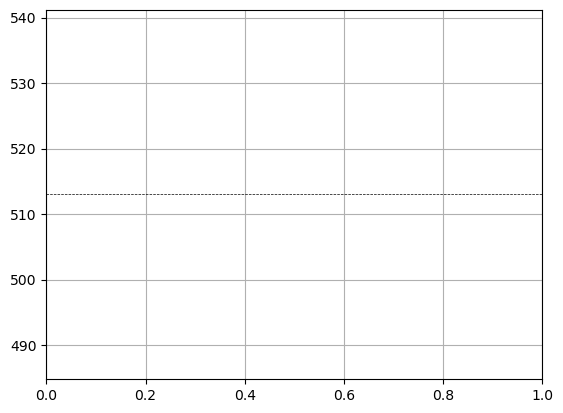

In [18]:
plt.grid()
ax1.set_xlabel('New X Label')  # Modify the x label name here
ax1.set_ylabel('New Y Label')  # Modify the y label name here
plt.axhline(y = 3*3*28.5*2, color = 'k', linestyle = '--', linewidth=0.5)

plt_filtered_PF(fig1, ax1, gen_file[4], 'gray', 'blue', lab='\si{LC/SP(P50)}')
plt_filtered_PF(fig1, ax1, gen_file[3], 'gray', 'red', lab='\si{LO(P50)}')

ax1.scatter([-7200], [513], s=10, c='blue', edgecolor='black', marker='o', linewidths=0.5, label='Def.\si{LC/SP(P50)}')
ax1.scatter([-2300], [513], s=10, c='red', edgecolor='black', marker='o', linewidths=0.5, label='Def.\si{LO(P50)}')
ax1.scatter([0], [6*3*28.5*2], s=10, c='white', edgecolor='black', marker='o', linewidths=1, label='Ref.Pto.')

#ax1.legend(bbox_to_anchor=(0.8, 1))

plt.show()
plt.draw()

# Save the histogram as a figure
plt.savefig("Figures/2307/NSGAII/Paretos.pdf", bbox_inches='tight')


In [ ]:
# Get required input for plotting the crystal shapes
ind=0
def crystalcoords_mult(gen_file,arg0,ind,vol):
    num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(gen_file[ind])
    obj1f,obj2f,idxf=filter_values(obj1,obj2,40)
    #print(obj2f)
    closest, closest_index=closest_value(obj2f,vol)
    #print('### Objective values: ',obj2f[closest_index-1],' ', obj1f[closest_index-1],' ',obj1f[closest_index-1]/obj2f[closest_index-1])
    print('### Objective values: ',closest,' ' ,closest_index,' ', obj1f[closest_index],' ',obj1f[closest_index]/obj2f[closest_index])
    #print(obj2f[closest_index+1],' ', obj1f[closest_index+1],' ',obj1f[closest_index+1]/obj2f[closest_index+1])
    original_idx = idxf[closest_index]
    print(vars_tuple[original_idx])

    Zhalf=28.5
    Yhalf=1.5
    #with original_idx as indv:	### optional variable arguments
    indv = original_idx
    ### get spline control points for different scenarions
    args=arg0
    legend_text='\nVolume: '+str(int(obj2f[closest_index]))+'\\si{\cubic\milli\meter}'+'\nLC: '+str(int(-obj1f[closest_index]))+'[ph]'
    if(args.Ysym[ind]==1):
        print("NoYSym")
        if (args.LYSOL[ind]==1):
            print("LYSOL")
            #print("Length:",vars_tuple)
            xtop,ytop,xbot,ybot = SplinePts_NoYSym_L(num_vars-1,vars_tuple,Yhalf,indv)
        else:
            xtop,ytop,xbot,ybot = SplinePts_NoYSym(num_vars,vars_tuple,Zhalf,Yhalf,indv)				
    else:
        print("YSym")
        if (args.LYSOL[ind]==1):
            print("LYSOL")
            #print("Length:",vars_tuple)
            xtop,ytop,xbot,ybot = SplinePts_YSym_L(num_vars-1,vars_tuple,Yhalf,indv)
        else:
            xtop,ytop,xbot,ybot = SplinePts_YSym(num_vars,vars_tuple,Yhalf,Zhalf,indv)
    return xtop,ytop,xbot,ybot,legend_text

leg=[]
fig1, ax1 = plt.subplots()
xtop,ytop,xbot,ybot,legend_text = crystalcoords_mult(gen_file,args0,0,10)
Plt_Crystal(xtop,ytop,xbot,ybot,fig1,ax1,'silver',lab='SiPM 3\\si{\milli\meter}x3.75\\si{\milli\meter}'+legend_text,
           lnstyle='-', lnwidth=1, alph=0.8)
leg.append(legend_text)


Plt_DefaultCrystal(fig1,ax1,colori='lightgray',ls='dotted')

# Create the legend with the plot name, volume, and light collection
#legend_text = 'My Scatter Plot\nVolume: 100\nLight Collection: 80'
#plt.legend([leg], loc='upper right')
ax1.legend(bbox_to_anchor=(1., 1.02))

plt.show()
plt.draw()
fig1.tight_layout()


In [ ]:
# Get required input for plotting the crystal shapes
ind=0
def crystalcoords_mult(gen_file,arg0,ind,vol):
    num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(gen_file[ind])
    obj1f,obj2f,idxf=filter_values(obj1,obj2,40)
    #print(obj2f)
    closest, closest_index=closest_value(obj2f,vol)
    #print('### Objective values: ',obj2f[closest_index-1],' ', obj1f[closest_index-1],' ',obj1f[closest_index-1]/obj2f[closest_index-1])
    print('### Objective values: ',closest,' ' ,closest_index,' ', obj1f[closest_index],' ',obj1f[closest_index]/obj2f[closest_index])
    #print(obj2f[closest_index+1],' ', obj1f[closest_index+1],' ',obj1f[closest_index+1]/obj2f[closest_index+1])
    original_idx = idxf[closest_index]
    #print(vars_tuple[original_idx])

    Zhalf=28.5
    Yhalf=1.5
    #with original_idx as indv:	### optional variable arguments
    indv = original_idx
    ### get spline control points for different scenarions
    args=arg0
    legend_text='\nVolume: '+str(int(obj2f[closest_index]))+'\\si{\cubic\milli\meter}'+'\nLC: '+str(int(-obj1f[closest_index]))+'[ph]'
    if(args.Ysym[ind]==1):
        print("NoYSym")
        if (args.LYSOL[ind]==1):
            print("LYSOL")
            #print("Length:",vars_tuple)
            xtop,ytop,xbot,ybot = SplinePts_NoYSym_L(num_vars-1,vars_tuple,Yhalf,indv)
        else:
            xtop,ytop,xbot,ybot = SplinePts_NoYSym(num_vars,vars_tuple,Zhalf,Yhalf,indv)				
    else:
        print("YSym")
        if (args.LYSOL[ind]==1):
            print("LYSOL")
            #print("Length:",vars_tuple)
            xtop,ytop,xbot,ybot = SplinePts_YSym_L(num_vars-1,vars_tuple,Yhalf,indv)
        else:
            xtop,ytop,xbot,ybot = SplinePts_YSym(num_vars,vars_tuple,Yhalf,Zhalf,indv)
    return xtop,ytop,xbot,ybot,legend_text

leg=[]
fig1, ax1 = plt.subplots()
xtop,ytop,xbot,ybot,legend_text = crystalcoords_mult(gen_file,args0,0,300)
Plt_Crystal(xtop,ytop,xbot,ybot,fig1,ax1,'silver',lab='SiPM 3\\si{\milli\meter}x3.75\\si{\milli\meter}'+legend_text,
           lnstyle='-', lnwidth=1, alph=0.8)
leg.append(legend_text)
xtop,ytop,xbot,ybot,legend_text = crystalcoords_mult(gen_file,args0,0,200)
Plt_Crystal(xtop,ytop,xbot,ybot,fig1,ax1,'gray',lab='SiPM 3\\si{\milli\meter}x3.75\\si{\milli\meter}'+legend_text,
           lnstyle='--', lnwidth=3, alph=0.8)
leg.append(legend_text)

Plt_DefaultCrystal(fig1,ax1,colori='lightgray',ls='dotted')

# Create the legend with the plot name, volume, and light collection
#legend_text = 'My Scatter Plot\nVolume: 100\nLight Collection: 80'
#plt.legend([leg], loc='upper right')
ax1.legend(bbox_to_anchor=(1., 1.02))

plt.show()
plt.draw()
fig1.tight_layout()
fig1.savefig("LatexPics/LYSOShapes_LowerThan513.pdf")

In [ ]:
# Get required input for plotting the crystal shapes
ind=0
def crystalcoords_mult(gen_file,arg0,ind,vol):
    num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(gen_file[ind])
    obj1f,obj2f,idxf=filter_values(obj1,obj2,40)
    #print(obj2f)
    closest, closest_index=closest_value(obj2f,vol)
    #print('### Objective values: ',obj2f[closest_index-1],' ', obj1f[closest_index-1],' ',obj1f[closest_index-1]/obj2f[closest_index-1])
    print('### Objective values: ',closest,' ' ,closest_index,' ', obj1f[closest_index],' ',obj1f[closest_index]/obj2f[closest_index])
    #print(obj2f[closest_index+1],' ', obj1f[closest_index+1],' ',obj1f[closest_index+1]/obj2f[closest_index+1])
    original_idx = idxf[closest_index]
    #print(vars_tuple[original_idx])

    Zhalf=28.5
    Yhalf=1.5
    #with original_idx as indv:	### optional variable arguments
    indv = original_idx
    ### get spline control points for different scenarions
    args=arg0
    legend_text='\nVolume: '+str(int(obj2f[closest_index]))+'\\si{\cubic\milli\meter}'+'\nLC: '+str(int(-obj1f[closest_index]))+'[ph]'
    if(args.Ysym[ind]==1):
        print("NoYSym")
        if (args.LYSOL[ind]==1):
            print("LYSOL")
            #print("Length:",vars_tuple)
            xtop,ytop,xbot,ybot = SplinePts_NoYSym_L(num_vars-1,vars_tuple,Yhalf,indv)
        else:
            xtop,ytop,xbot,ybot = SplinePts_NoYSym(num_vars,vars_tuple,Zhalf,Yhalf,indv)				
    else:
        print("YSym")
        if (args.LYSOL[ind]==1):
            print("LYSOL")
            #print("Length:",vars_tuple)
            xtop,ytop,xbot,ybot = SplinePts_YSym_L(num_vars-1,vars_tuple,Yhalf,indv)
        else:
            xtop,ytop,xbot,ybot = SplinePts_YSym(num_vars,vars_tuple,Yhalf,Zhalf,indv)
    return xtop,ytop,xbot,ybot,legend_text

leg=[]
fig1, ax1 = plt.subplots()
xtop,ytop,xbot,ybot,legend_text = crystalcoords_mult(gen_file,args0,0,600)
Plt_Crystal(xtop,ytop,xbot,ybot,fig1,ax1,'silver',lab='SiPM 3\\si{\milli\meter}x3.75\\si{\milli\meter}'+legend_text,
           lnstyle='-', lnwidth=1, alph=0.8)
leg.append(legend_text)
xtop,ytop,xbot,ybot,legend_text = crystalcoords_mult(gen_file,args0,0,700)
Plt_Crystal(xtop,ytop,xbot,ybot,fig1,ax1,'gray',lab='SiPM 3\\si{\milli\meter}x3.75\\si{\milli\meter}'+legend_text,
           lnstyle='--', lnwidth=3, alph=0.8)
leg.append(legend_text)

Plt_DefaultCrystal(fig1,ax1,colori='lightgray',ls='dotted')

# Create the legend with the plot name, volume, and light collection
#legend_text = 'My Scatter Plot\nVolume: 100\nLight Collection: 80'
#plt.legend([leg], loc='upper right')
ax1.legend(bbox_to_anchor=(1., 1.02))

plt.show()
plt.draw()
fig1.tight_layout()
fig1.savefig("LatexPics/LYSOShapes_HigherThan513.pdf")

In [ ]:
# Get required input for plotting the crystal shapes
ind=0
def crystalcoords_mult(gen_file,arg0,ind,vol):
    num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(gen_file[ind])
    obj1f,obj2f,idxf=filter_values(obj1,obj2,40)
    #print(obj2f)
    closest, closest_index=closest_value(obj2f,vol)
    #print('### Objective values: ',obj2f[closest_index-1],' ', obj1f[closest_index-1],' ',obj1f[closest_index-1]/obj2f[closest_index-1])
    print('### Objective values: ',closest,' ' ,closest_index,' ', obj1f[closest_index],' ',obj1f[closest_index]/obj2f[closest_index])
    #print(obj2f[closest_index+1],' ', obj1f[closest_index+1],' ',obj1f[closest_index+1]/obj2f[closest_index+1])
    original_idx = idxf[closest_index]
    #print(vars_tuple[original_idx])

    Zhalf=28.5
    Yhalf=1.5
    #with original_idx as indv:	### optional variable arguments
    indv = original_idx
    ### get spline control points for different scenarions
    args=arg0
    legend_text='\nVolume: '+str(int(obj2f[closest_index]))+'\\si{\cubic\milli\meter}'+'\nLC: '+str(int(-obj1f[closest_index]))+'[ph]'
    if(args.Ysym[ind]==1):
        print("NoYSym")
        if (args.LYSOL[ind]==1):
            print("LYSOL")
            #print("Length:",vars_tuple)
            xtop,ytop,xbot,ybot = SplinePts_NoYSym_L(num_vars-1,vars_tuple,Yhalf,indv)
        else:
            xtop,ytop,xbot,ybot = SplinePts_NoYSym(num_vars,vars_tuple,Zhalf,Yhalf,indv)				
    else:
        print("YSym")
        if (args.LYSOL[ind]==1):
            print("LYSOL")
            #print("Length:",vars_tuple)
            xtop,ytop,xbot,ybot = SplinePts_YSym_L(num_vars-1,vars_tuple,Yhalf,indv)
        else:
            xtop,ytop,xbot,ybot = SplinePts_YSym(num_vars,vars_tuple,Yhalf,Zhalf,indv)
    return xtop,ytop,xbot,ybot,legend_text

leg=[]
Volv=[200,300,400,600,700,800]
for Vol in Volv:
    fig1, ax1 = plt.subplots()
    xtop,ytop,xbot,ybot,legend_text = crystalcoords_mult(gen_file,args0,0,Vol)
    Plt_Crystal(xtop,ytop,xbot,ybot,fig1,ax1,'silver',lab='SiPM 3\\si{\milli\meter}x3.75\\si{\milli\meter}'+legend_text,
               lnstyle='-', lnwidth=1, alph=0.8)

    Plt_DefaultCrystal(fig1,ax1,colori='gray',ls='dotted')

    # Create the legend with the plot name, volume, and light collection
    #legend_text = 'My Scatter Plot\nVolume: 100\nLight Collection: 80'
    #plt.legend([leg], loc='upper right')
    ax1.legend(bbox_to_anchor=(1., 1.02))

    plt.show()
    plt.draw()
    fig1.tight_layout()
    fig1.savefig("LatexPics/LYSOShapes_"+str(Vol)+".pdf")

In [ ]:

fig1, ax1 = plt.subplots()
xtop,ytop,xbot,ybot,legend_text = crystalcoords_mult(gen_file,args0,0,513)
Plt_Crystal(xtop,ytop,xbot,ybot,fig1,ax1,'gray',lab='SiPM 3\\si{\milli\meter}x3.75\\si{\milli\meter}'+legend_text,
           lnstyle='-', lnwidth=1, alph=0.8)
Plt_DefaultCrystal(fig1,ax1,colori='lightgray',ls='dotted')

ax1.plot([-28.5,28.5], [0.375,0.375],color='darkgray',linestyle='dotted')
ax1.plot([-28.5,28.5], [-0.375,-0.375],color='darkgray',linestyle='dotted')
ax1.plot([-28.5,28.5], [3.375,3.375],color='darkgray',linestyle='dotted')
ax1.plot([-28.5,28.5], [-3.375,-3.375],color='darkgray',linestyle='dotted')
ax1.plot([-28.5,-28.5], [3.375,-3.375],color='darkgray',linestyle='dotted')
ax1.plot([28.5,28.5], [3.375,-3.375],color='darkgray',linestyle='dotted')


L1=23
x1=28.5*3/L1/2
xs=1.5
Ls=L1+1.8

ax1.plot([-Ls,-L1], [xs,xs],color='darkgray',linestyle='-')
ax1.plot([-Ls,-L1], [-xs,-xs],color='darkgray',linestyle='-')
ax1.plot([-Ls,-Ls], [xs,-xs],color='darkgray',linestyle='-')
ax1.plot([-L1,-L1], [xs,-xs],color='darkgray',linestyle='-')

ax1.plot([Ls,L1], [xs,xs],color='darkgray',linestyle='-')
ax1.plot([Ls,L1], [-xs,-xs],color='darkgray',linestyle='-')
ax1.plot([Ls,Ls], [xs,-xs],color='darkgray',linestyle='-')
ax1.plot([L1,L1], [xs,-xs],color='darkgray',linestyle='-')

plt.xlim((-32,32))
L1=28.5
Ls=28.5+1.8

ax1.plot([-Ls,-L1], [xs,xs],color='lightgray',linestyle='--')
ax1.plot([-Ls,-L1], [-xs,-xs],color='lightgray',linestyle='--')
ax1.plot([-Ls,-Ls], [xs,-xs],color='lightgray',linestyle='--')
ax1.plot([-L1,-L1], [xs,-xs],color='lightgray',linestyle='--')

ax1.plot([Ls,L1], [xs,xs],color='lightgray',linestyle='--')
ax1.plot([Ls,L1], [-xs,-xs],color='lightgray',linestyle='--')
ax1.plot([Ls,Ls], [xs,-xs],color='lightgray',linestyle='--')
ax1.plot([L1,L1], [xs,-xs],color='lightgray',linestyle='--')

ax1.plot([0,0], [-2.2,2.2],color='black',linestyle='dashdot')

plt.axis('off')

#ax1.annotate('x', xy=(0, 0), xytext=(5, 0),
#            arrowprops=dict(facecolor='black', shrink=0.05))
ax1.annotate('$y_{min}$', xy=(-26, 0.25), xytext=(-20, 0.5))
ax1.annotate('$y_{max}$', xy=(-26, 0.25), xytext=(-20, 3.5))
ax1.annotate('$y_{0}$', xy=(-26, 0.25), xytext=(-30, 1.6))
ax1.annotate('$SiPM_{0}$', xy=(-26, 0.25), xytext=(-32, -0.5),rotation=90, c='lightgray')
ax1.annotate('$SiPM_{1}$', xy=(-26, 0.25), xytext=(-27, -0.5),rotation=90, c='gray')

ax1.annotate('Lateral View', xy=(-26, 0.25), xytext=(17, 3.5), c='black')


ax1.annotate('Control Points', xy=(xtop[0]+0.1, ytop[0]+0.1), xytext=(xtop[0]+1, ytop[0]+0.8),
            arrowprops={'arrowstyle': '->'}, va='center')
ax1.annotate('Control Points', xy=([xtop[1]+0.1, ytop[1]+0.1]), xytext=(xtop[0]+1, ytop[0]+0.8),
            arrowprops={'arrowstyle': '->'}, va='center')
ax1.annotate('Control Points', xy=([xtop[2]+0.1, ytop[2]+0.1]), xytext=(xtop[0]+1, ytop[0]+0.8),
            arrowprops={'arrowstyle': '->'}, va='center')

ax1.annotate('z', xy=(0,0), xytext=(5,0),
            arrowprops={'arrowstyle': '<-'}, va='center')
ax1.annotate('y', xy=(0.9,0), xytext=(0.4,1),
            arrowprops={'arrowstyle': '<-'}, va='center')
#ax1.arrow(0, 0, 3, 0, head_width=0.2)

plt.show()
plt.draw()

fig1.tight_layout()
fig1.savefig("LatexPics/LYSOSplineSchematic.pdf")

In [ ]:
fig1, ax1 = plt.subplots()

Plt_DefaultCrystal(fig1,ax1,colori='lightgray',ls='dotted')

x1=4.75/2
xs=1.5
L1=18
Ls=L1+1.8
ax1.plot([-L1,L1], [x1,x1],color='darkgray',linestyle='-')
ax1.plot([-L1,L1], [-x1,-x1],color='darkgray',linestyle='-')
ax1.plot([-L1,-L1], [x1,-x1],color='darkgray',linestyle='-')
ax1.plot([L1,L1], [x1,-x1],color='darkgray',linestyle='-')

x1=4.75/2
xs=1.5
L1=18
Ls=L1+1.8
ax1.annotate('$Z_1$', xy=(-L1,xs*1.5), xytext=(+L1,xs*1.5),
            arrowprops={'arrowstyle': '<->'}, va='center')

ax1.plot([-Ls,-L1], [xs,xs],color='darkgray',linestyle='-')
ax1.plot([-Ls,-L1], [-xs,-xs],color='darkgray',linestyle='-')
ax1.plot([-Ls,-Ls], [xs,-xs],color='darkgray',linestyle='-')
ax1.plot([-L1,-L1], [xs,-xs],color='darkgray',linestyle='-')

ax1.plot([Ls,L1], [xs,xs],color='darkgray',linestyle='-')
ax1.plot([Ls,L1], [-xs,-xs],color='darkgray',linestyle='-')
ax1.plot([Ls,Ls], [xs,-xs],color='darkgray',linestyle='-')
ax1.plot([L1,L1], [xs,-xs],color='darkgray',linestyle='-')

L1=28.5
Ls=28.5+1.8

ax1.plot([-Ls,-L1], [xs,xs],color='lightgray',linestyle='--')
ax1.plot([-Ls,-L1], [-xs,-xs],color='lightgray',linestyle='--')
ax1.plot([-Ls,-Ls], [xs,-xs],color='lightgray',linestyle='--')
ax1.plot([-L1,-L1], [xs,-xs],color='lightgray',linestyle='--')

ax1.plot([Ls,L1], [xs,xs],color='lightgray',linestyle='--')
ax1.plot([Ls,L1], [-xs,-xs],color='lightgray',linestyle='--')
ax1.plot([Ls,Ls], [xs,-xs],color='lightgray',linestyle='--')
ax1.plot([L1,L1], [xs,-xs],color='lightgray',linestyle='--')

ax1.annotate('z', xy=(0,0), xytext=(5,0),
            arrowprops={'arrowstyle': '<-'}, va='center')
ax1.annotate('x', xy=(0.,0), xytext=(-0.5,1),
            arrowprops={'arrowstyle': '<-'}, va='center')

ax1.annotate('$Z_0$', xy=(-28.5,2.5), xytext=(+28.5,2.5),
            arrowprops={'arrowstyle': '<->'}, va='center')

ax1.annotate('$X_0$', xy=(+31.6,1.55), xytext=(+30.5,-1.7),
            arrowprops={'arrowstyle': '<->'}, va='center', rotation=90)
ax1.annotate('$X_1$', xy=(-31.4,2.4), xytext=(-32.5,-2.6),
            arrowprops={'arrowstyle': '<->'}, va='center', rotation=90)

plt.axis('off')

plt.show()
plt.draw()
fig1.tight_layout()
fig1.savefig("LatexPics/LYSOAreaSchematic.pdf")

In [ ]:
import matplotlib.pyplot as plt

# Generate some data for the scatter plot
x = [1, 2, 3, 4, 5]
y = [10, 15, 13, 17, 20]

# Create the scatter plot
plt.scatter(x, y)

# Add labels to the axes
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')

# Create the legend with the plot name, volume, and light collection
legend_text = 'My Scatter Plot\nVolume: 100\nLight Collection: 80'
plt.legend([legend_text], loc='upper right')

# Show the plot
plt.show()

In [ ]:
	if(args.save==1):
			imagename="LYSO_Vol_"+str(round(obj2[indv],1))+"_LC_"+str(round(abs(obj1[indv]),1))
			save_name=pictures_folder_filter+imagename
			print(save_name)
			plt.savefig(save_name, format='png', dpi=300, bbox_inches='tight')
	"""except:
		imagename="LYSO_Vol_"+str(round(obj2[indv],1))+"_LC_"+str(round(abs(obj1[indv]),1))
		print("### ERROR: ",pictures_folder_filter+imagename)*/		"""

In [ ]:
import matplotlib.pyplot as plt

def plot_with_error_bars(x, y, xerr):
    fig, ax = plt.subplots()
    ax.errorbar(x, y, xerr=xerr, fmt='o', capsize=3)
    ax.set_xlabel("X data")
    ax.set_ylabel("Y data")
    plt.show()
x = [1, 2, 3, 4]
y = [2, 4, 6, 8]
xerr = [0.5, 0.4, 0.3, 0.2]

plot_with_error_bars(x, y, xerr)

In [ ]:
!pip install pygmo

In [ ]:
from pygmo import hypervolume

# Assume solutions is a 2D list where each inner list is a solution
solutions = [[1,0], [0.5,0.5], [0,1]]

# Create a hypervolume object
hv = hypervolume(solutions)

# Define the reference point
reference_point = [1.1, 1.1]  # This should be slightly greater than the maximum objective values

# Calculate hypervolume
volume = hv.compute(reference_point)

print(f"The hypervolume is: {volume}")

In [ ]:
test = [[i,j] for i,j in zip(obj1,obj2)]
# Create a hypervolume object
hv = hypervolume(test)

# Define the reference point
reference_point = [4000, 513]  # This should be slightly greater than the maximum objective values

# Calculate hypervolume
volume = hv.compute(reference_point)

print(f"The hypervolume is: {volume}")